In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import json
sns.set_style("ticks",{'axes.grid' : True})

## Датасет 1

In [25]:
with open('./result/data1/open_opt_params.json', 'r') as f:
    dtype_1 = json.load(f)
df_1 = pd.read_csv('./data/data_1.csv', dtype=dtype_1, parse_dates=['date'], index_col=0)
df_1[:3]

,date,day_of_week,v_score,h_score,day_night,length_minutes,v_assists,v_errors,h_assists,h_errors
0,1871-05-04,Thu,0,2,D,120.0,9.0,0.0,3.0,3.0
1,1871-05-05,Fri,20,18,D,145.0,13.0,10.0,20.0,10.0
2,1871-05-06,Sat,12,4,D,140.0,12.0,8.0,12.0,13.0


<Axes: xlabel='date'>

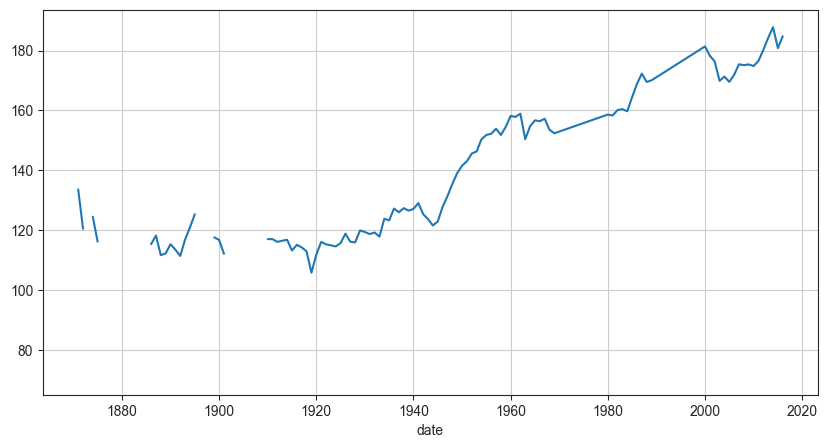

In [26]:
# 1.1. График показывает среднюю продолжительность матча за год
# из графика видно, что ранее матчи были короче 
plt.figure(figsize=(10,5))
df_1.groupby(df_1['date'].dt.year)["length_minutes"].mean().plot()

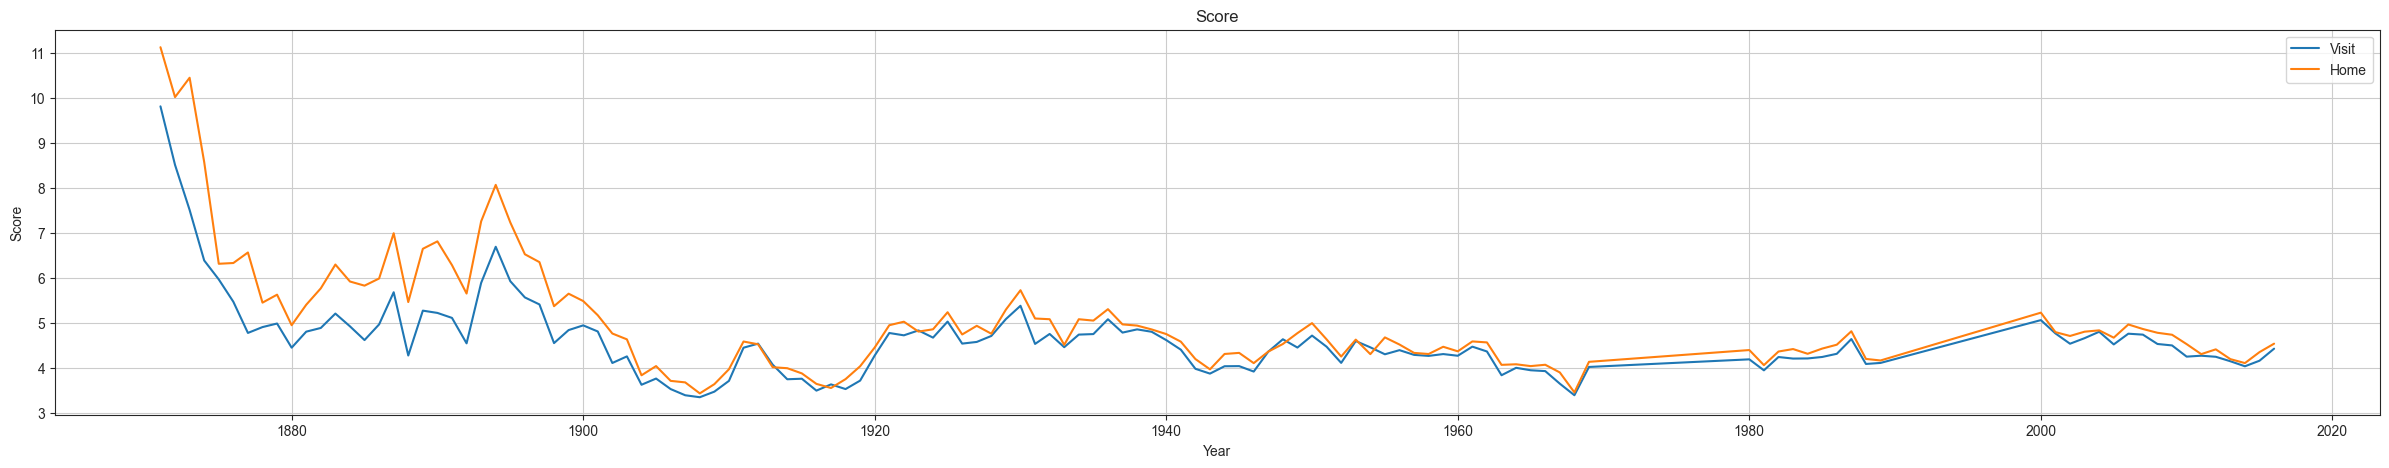

In [27]:
# 1.2. график для сравнения набранных очков за матч при игре дома (оранжевый) и в гостях (синий)
# можно отметить, что дома количество очков выше, чем в гостях
# также можно отметить, что до ~1900 годов количество очков было выше, чем сейчас
plt.figure(figsize=(30,5))
gr_obj_1 = df_1.groupby(df_1['date'].dt.year)["v_score"].mean()
gr_obj_2 = df_1.groupby(df_1['date'].dt.year)["h_score"].mean()
X_1 = gr_obj_1.index
Y_1 = gr_obj_1.values
X_2 = gr_obj_2.index
Y_2 = gr_obj_2.values
plt.plot(X_1, Y_1, label="Visit") # синий
plt.plot(X_2, Y_2, label="Home") # оранжевый
plt.title('Score')
plt.xlabel('Year')
plt.ylabel('Score')
plt.legend()

<Axes: title={'center': 'Count of games in day of weeks'}, xlabel='day_of_week'>

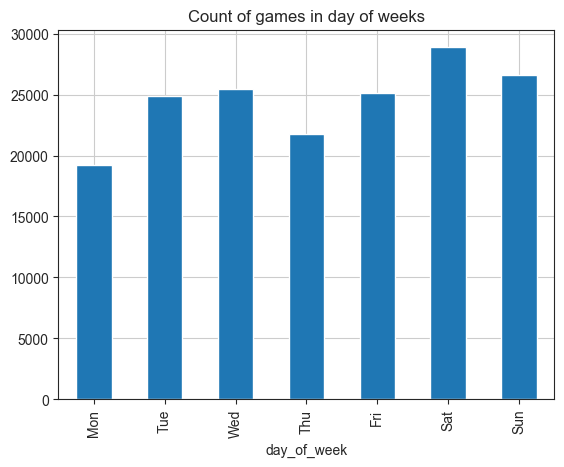

In [28]:
# 1.3. Столбчатая диаграмма, которая отображает количество матчей по дням недели
# стоит отметить, что больше всего игр было в выходной в Субботу, а меньше всего - в Понедельник
df_1['day_of_week'].value_counts()[['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']].plot(kind='bar', title='Count of games in day of weeks', x='Day of week', y='Count of games')

<Axes: title={'center': 'Count of day/night matches'}, ylabel='count'>

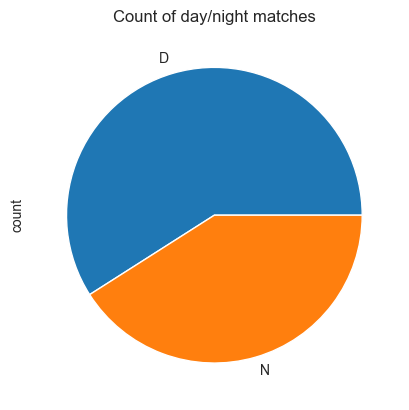

In [29]:
# 1.4. Круговая диаграмма количества дневных и ночных матчей.
df_1['day_night'].value_counts().plot(kind='pie', title='Count of day/night matches')

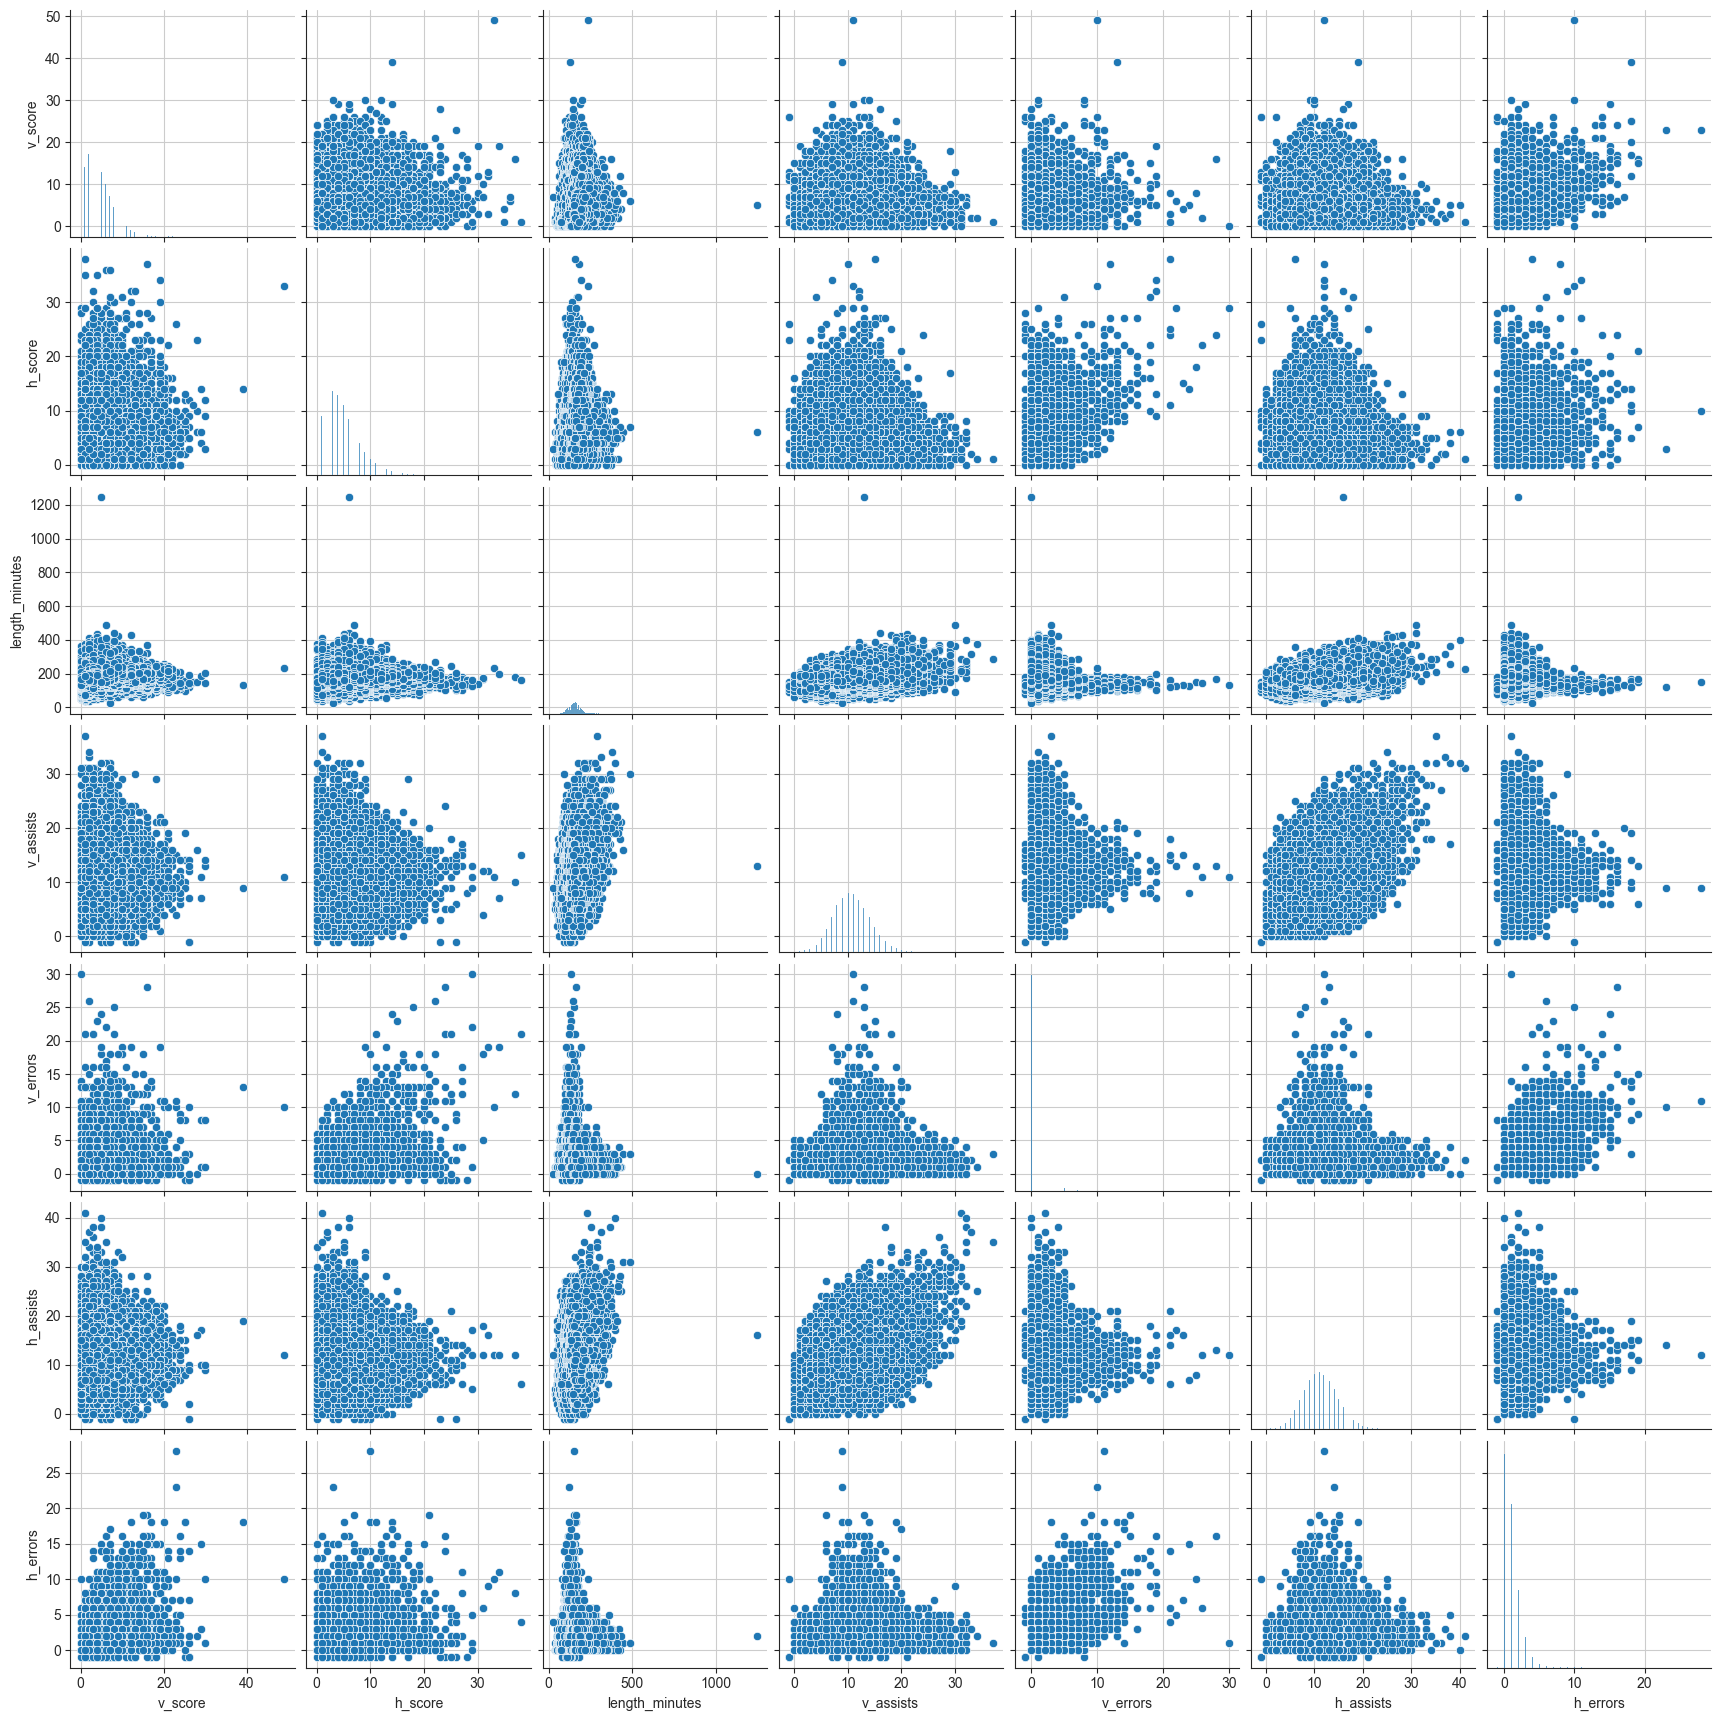

In [30]:
# 1.5. pairplot
sns.pairplot(df_1)

## Датасет 2

In [20]:
with open('./result/data2/open_opt_params.json', 'r') as f:
    dtype_2 = json.load(f)
df_2 = pd.read_csv('./data/data_2.csv', dtype=dtype_2, index_col=0)
df_2.sample(3)

,msrp,isNew,brandName,dealerID,vf_ABS,vf_FuelTypePrimary,vf_ModelYear,vf_Seats,vf_TopSpeedMPH,vf_TransmissionStyle
4163787,32995,False,FORD,20600,NaN,Gasoline,2016.0,NaN,NaN,NaN
470536,38599,False,GMC,22349,NaN,Diesel,2013.0,NaN,NaN,NaN
1491270,33055,True,SUBARU,6131,NaN,Gasoline,2020.0,NaN,NaN,Continuously Variable Transmission (CVT)


<Axes: xlabel='vf_ModelYear'>

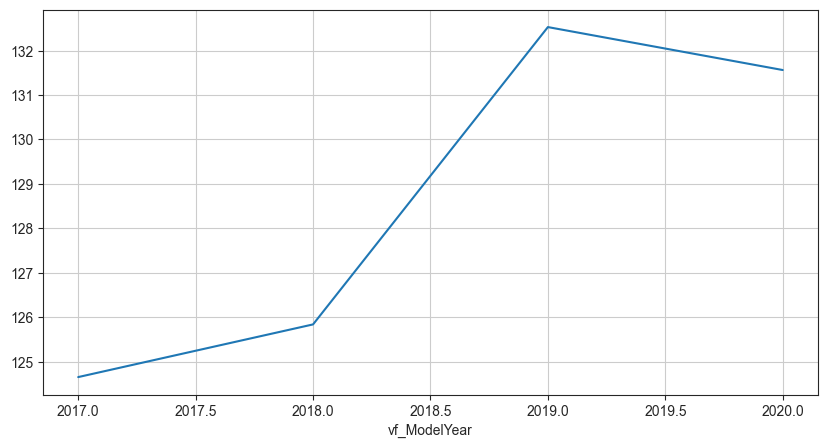

In [21]:
# 2.1. График показывает среднюю максимальную скорость автомобилей, произведённых в определённый год
# предполагал, что максимальная скорость авто должна расти со временем, в целом выглядит всё примерно так, но как-то не явно
plt.figure(figsize=(10,5))
df_2.groupby(df_2['vf_ModelYear'])["vf_TopSpeedMPH"].mean().plot()

msrp                    0.000000
isNew                   0.000000
brandName               0.000221
dealerID                0.000000
vf_ABS                  0.590756
vf_FuelTypePrimary      0.029224
vf_ModelYear            0.000225
vf_Seats                0.630543
vf_TopSpeedMPH          0.842419
vf_TransmissionStyle    0.662136
dtype: float64

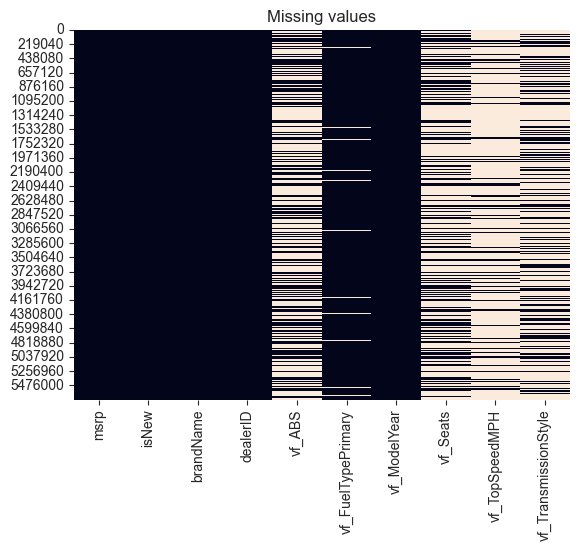

In [22]:
# 2.2. Визуальный анализ отсутствующих значений
sns.heatmap(df_2.isnull(), cbar = False).set_title("Missing values")
df_2.isnull().sum() / df_2.shape[0]

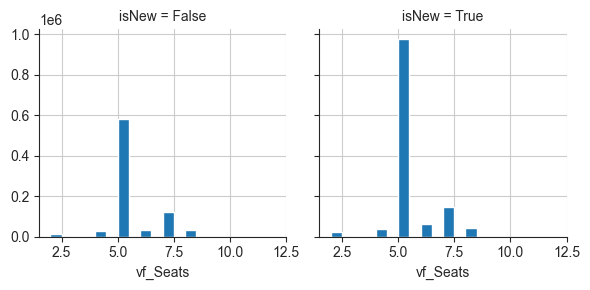

In [23]:
# 2.3. Сравнение количества новых и не невых авто по отношению к количеству сидений в них
# заметно, что количество 5местных авто преобладает, 
# но в целом видно, что все автомобили 
g = sns.FacetGrid(df_2, col='isNew')
g.map(plt.hist, 'vf_Seats', bins=20)

<Axes: xlabel='vf_ModelYear', ylabel='vf_FuelTypePrimary'>

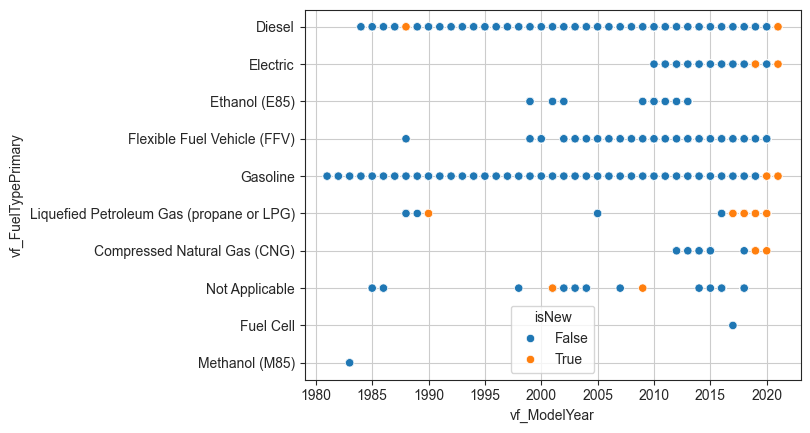

In [3]:
# 2.4 График отображает использование топливной системы в зависимости от года модели
# из графика видно, что больше дольше всего на рынке авто производятся машины на ДВС,
# к 2010 году появились электрокары
sns.scatterplot(data=df_2, x='vf_ModelYear', y='vf_FuelTypePrimary', hue="isNew")

<Axes: xlabel='vf_FuelTypePrimary'>

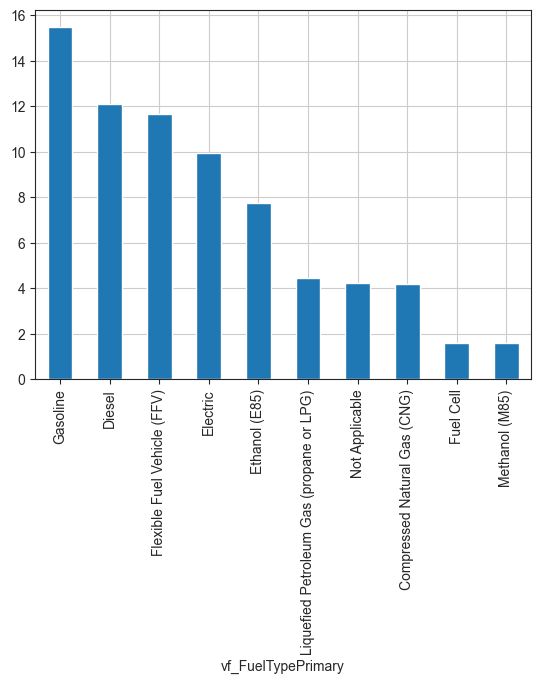

In [24]:
# 2.5 сравенение количества топливных систем среди автомобилей
import math
df_2['vf_FuelTypePrimary'].value_counts().apply(math.log).plot(kind='bar')

## Датасет 3

In [13]:
with open('./result/data3/open_opt_params.json', 'r') as f:
    dtype_3 = json.load(f)
df_3 = pd.read_csv('./data/data_3.csv', dtype=dtype_3, index_col=0)
df_3.sample(3)

,YEAR,DAY_OF_WEEK,AIRLINE,ORIGIN_AIRPORT,DESTINATION_AIRPORT,DEPARTURE_DELAY,ELAPSED_TIME,DISTANCE,ARRIVAL_DELAY,CANCELLED
178426,2015,1,OO,RDU,IAH,50.0,188.0,1042,47.0,0
44420,2015,6,AA,OGG,DFW,12.0,440.0,3711,22.0,0
253392,2015,6,MQ,ORD,CMH,-1.0,64.0,296,-13.0,0


YEAR                   0.000000
DAY_OF_WEEK            0.000000
AIRLINE                0.000000
ORIGIN_AIRPORT         0.000000
DESTINATION_AIRPORT    0.000000
DEPARTURE_DELAY        0.020169
ELAPSED_TIME           0.023321
DISTANCE               0.000000
ARRIVAL_DELAY          0.023321
CANCELLED              0.000000
dtype: float64

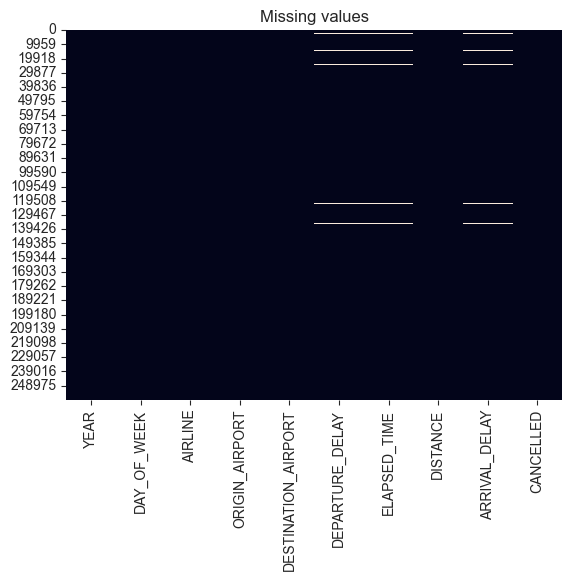

In [14]:
# 3.1. Визуальный анализ отсутствующих значений
sns.heatmap(df_3.isnull(), cbar = False).set_title("Missing values")
df_3.isnull().sum() / df_3.shape[0]

C:\Users\Andrew\AppData\Local\Temp\ipykernel_14964\1884363969.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  mean_delay_by_airport = df_3.groupby('ORIGIN_AIRPORT')['DEPARTURE_DELAY'].mean().sort_values(ascending=False)


<Axes: title={'center': 'DEPARTURE DELAY BY ORIGIN AIRPORT'}, xlabel='ORIGIN_AIRPORT'>

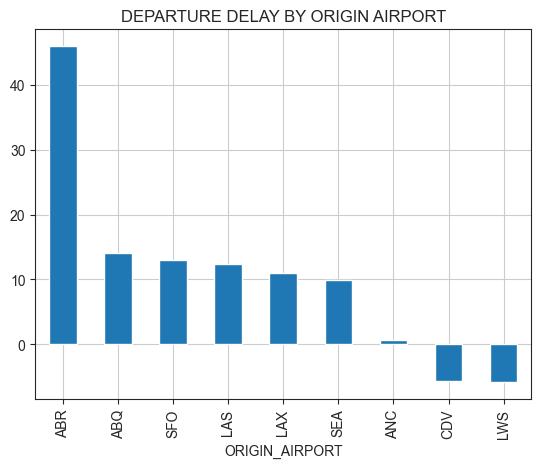

In [15]:
# 3.2. Средняя задержка по аэропорту отправления согласно списку
airport_list = ['ANC', 'LAX', 'SFO', 'SEA', 'LAS', 'CDV', 'LWS', 'ABQ', 'ABR']
mean_delay_by_airport = df_3.groupby('ORIGIN_AIRPORT')['DEPARTURE_DELAY'].mean().sort_values(ascending=False)
mean_delay_by_airport[mean_delay_by_airport.index.isin(airport_list)].plot(kind='bar', title='DEPARTURE DELAY BY ORIGIN AIRPORT')

<Axes: title={'center': 'Count of airlines'}, ylabel='count'>

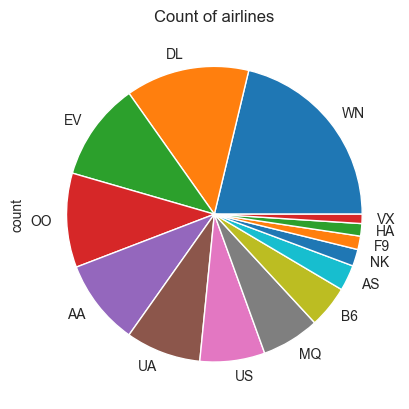

In [16]:
# 3.3. Круговая диаграмма, отображающая количество авиакомпаний по всему датасету
df_3['AIRLINE'].value_counts().plot(kind='pie', title='Count of airlines')

<Figure size 1600x2000 with 0 Axes>

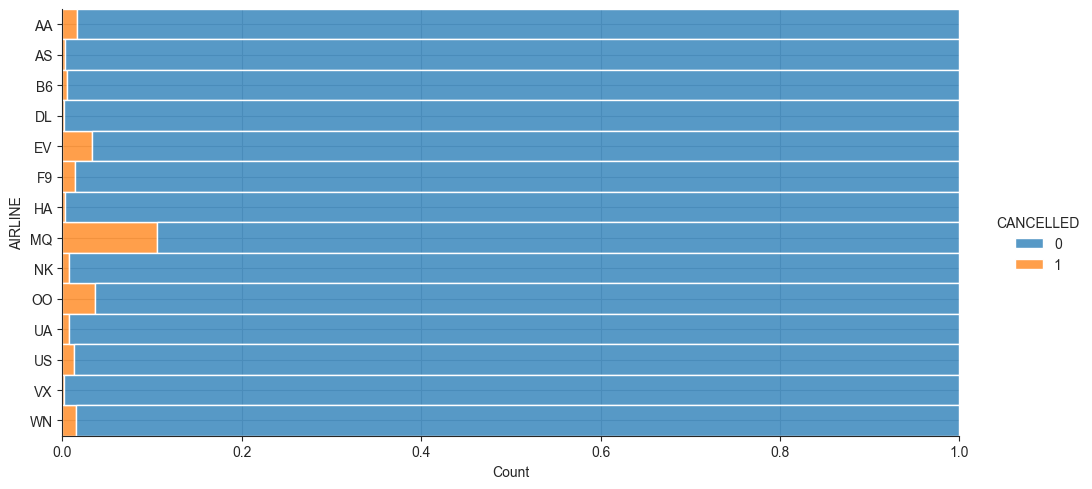

In [17]:
# 3.4. Отображение отменённых рейсов по авиакомпаниям
plt.figure(figsize=(16,20))
sns.displot(
    data=df_3,
    y="AIRLINE",
    hue="CANCELLED",
    multiple="fill",
    aspect=2,
)

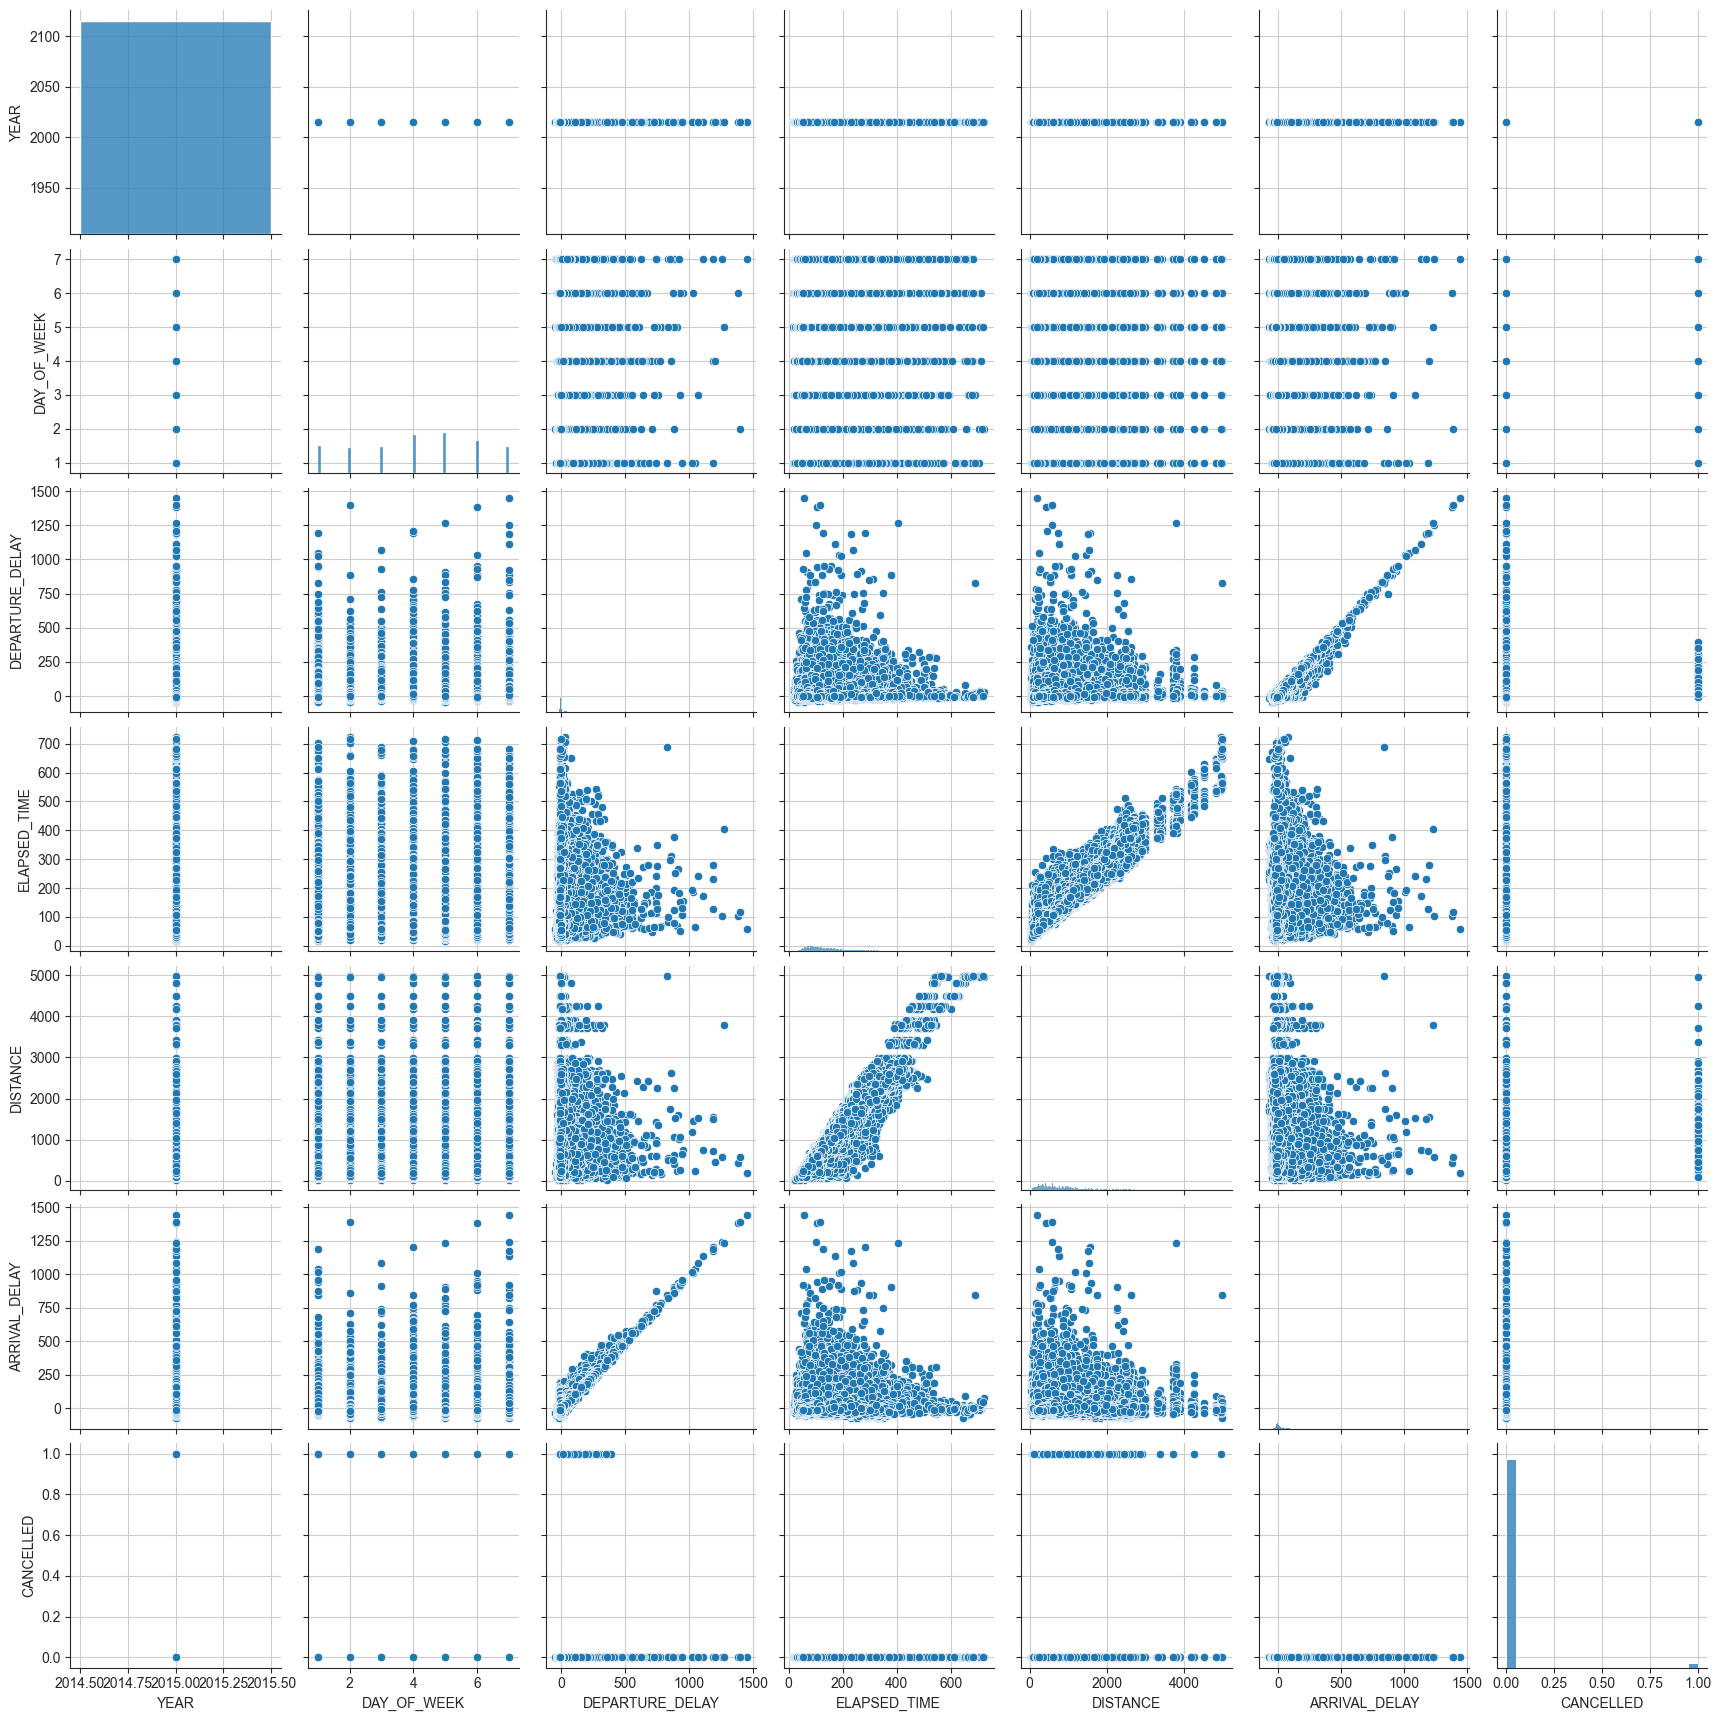

In [18]:
# 3.5. Pairplot
sns.pairplot(df_3)

## Датасет 4

In [4]:
with open('./result/data4/open_opt_params.json', 'r') as f:
    dtype_4 = json.load(f)
df_4 = pd.read_csv('./data/data_4.csv', dtype=dtype_4, index_col=0)
df_4.sample(3)

,schedule_name,experience_name,accept_incomplete_resumes,employer_name,salary_from,salary_to,archived,area_name,prof_classes_found
319247,Удаленная работа,От 1 года до 3 лет,True,Идеальный турник,100000.0,500000.0,True,Санкт-Петербург,prodajnik rukovoditel
320152,Полный день,От 1 года до 3 лет,False,Велес-Мит,800.0,NaN,True,Молодечно,sysadmin
308555,Полный день,От 3 до 6 лет,False,СТРИЖ-Логистик,70000.0,90000.0,True,Москва,sysadmin


In [ ]:
df_4.describe(include='all')

schedule_name                0.000000
experience_name              0.000000
accept_incomplete_resumes    0.000000
employer_name                0.000000
salary_from                  0.559692
salary_to                    0.720050
archived                     0.000000
area_name                    0.000000
prof_classes_found           0.018452
dtype: float64

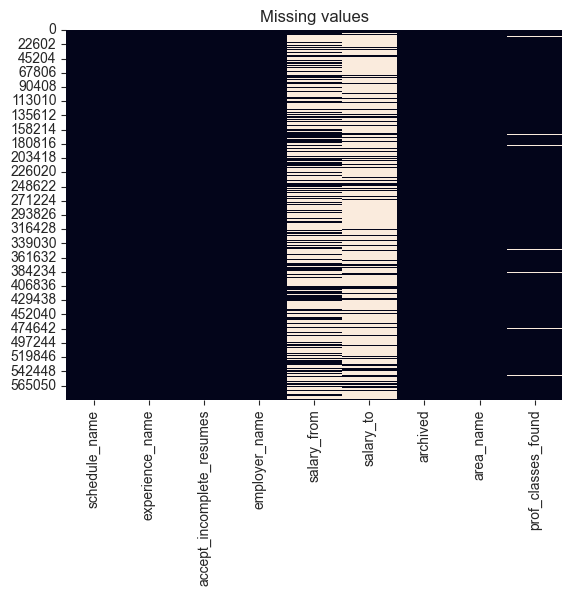

In [19]:
# 4.1. Визуальный анализ отсутствующих значений
sns.heatmap(df_4.isnull(), cbar = False).set_title("Missing values")
df_4.isnull().sum() / df_4.shape[0]

<Axes: title={'center': 'Count of schedule_name'}, ylabel='count'>

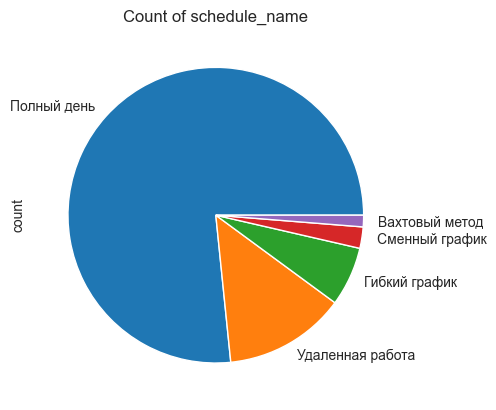

In [20]:
# 4.2. Круговая диаграмма, отображающая количество вакансий в зависимости от условий занятости
df_4['schedule_name'].value_counts().plot(kind='pie', title='Count of schedule_name')

C:\Users\Andrew\AppData\Local\Temp\ipykernel_14964\2799276052.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  sns.barplot(df_4.groupby(['experience_name', 'archived'], as_index=False)['salary_from'].mean(),


<Axes: xlabel='experience_name', ylabel='salary_from'>

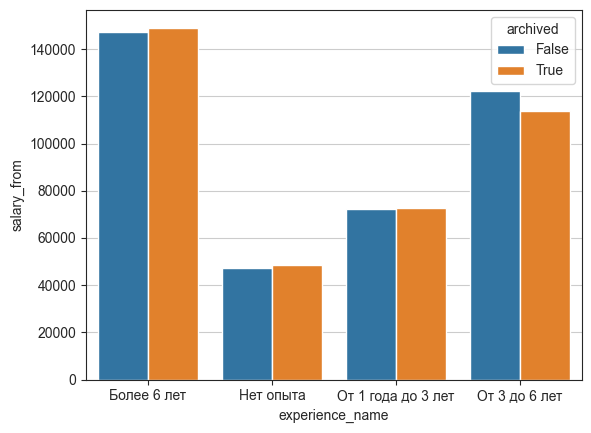

In [21]:
# 4.3 Средняя зп в зависимости от опыта работы
sns.barplot(df_4.groupby(['experience_name', 'archived'], as_index=False)['salary_from'].mean(), 
            hue='archived', 
            x='experience_name', 
            y='salary_from')

<Figure size 1600x2000 with 0 Axes>

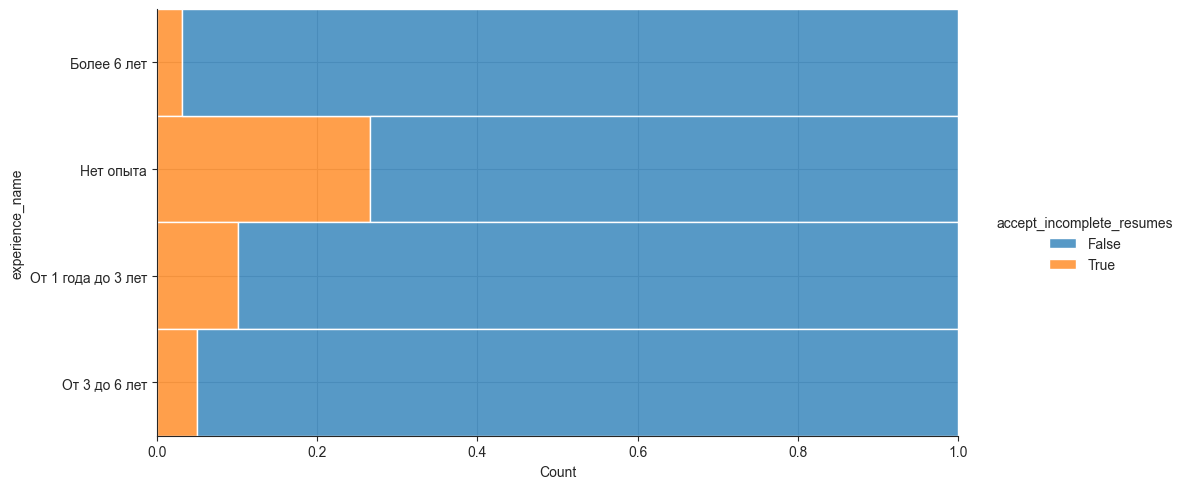

In [22]:
plt.figure(figsize=(16,20))
sns.displot(
    data=df_4,
    y="experience_name",
    hue="accept_incomplete_resumes",
    multiple="fill",
    aspect=2,
)
# accept_incomplete_resumes

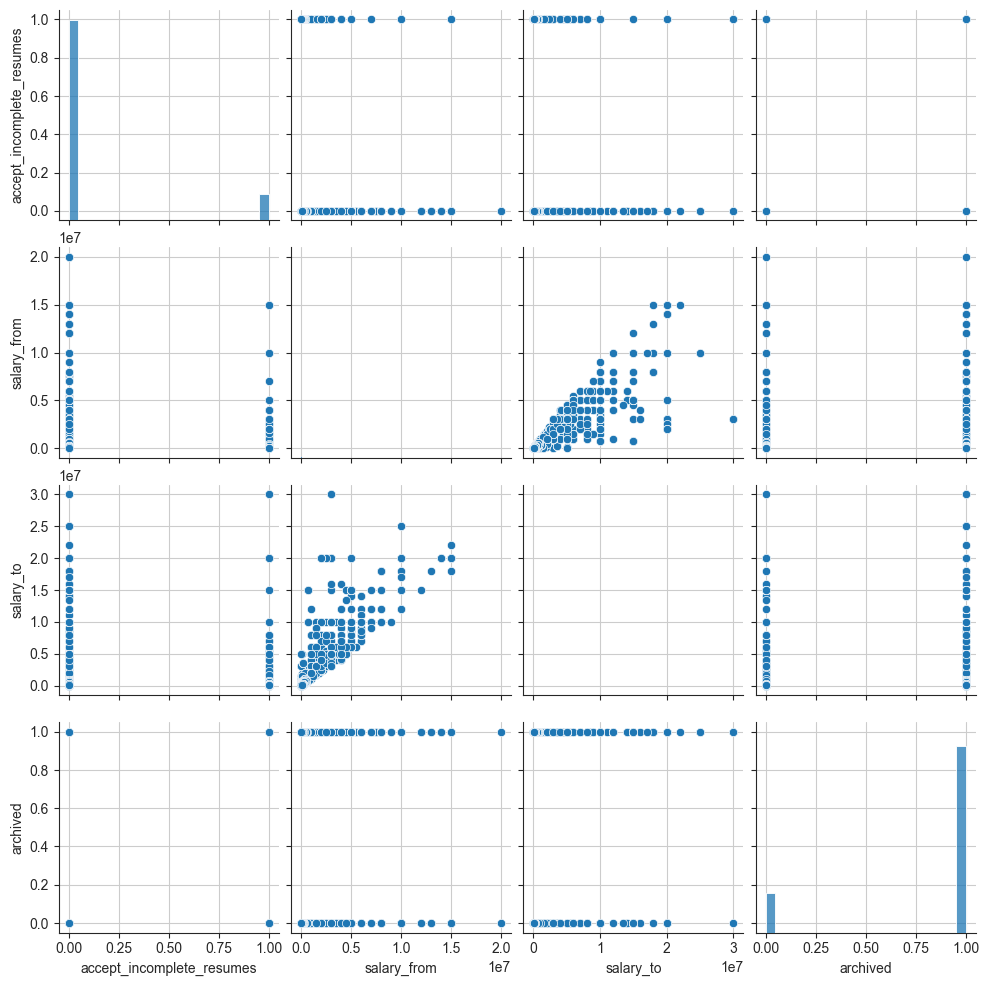

In [5]:
# 4.5. Pairplot
sns.pairplot(df_4)

## Датасет 5

In [23]:
with open('./result/data5/open_opt_params.json', 'r') as f:
    dtype_5 = json.load(f)
df_5 = pd.read_csv('./data/data_5.csv', dtype=dtype_5, index_col=0)
df_5.sample(3)

,name,neo,H,diameter,orbit_id,om,w,moid,class,rms
720865,NaN,N,17.700001,NaN,5,81.724953,154.467224,1.11457,MBA,0.49963
102495,NaN,N,15.900000,3.616,JPL 21,14.849670,134.340637,1.07888,MBA,0.50018
402156,NaN,N,16.299999,NaN,JPL 14,339.365417,53.931484,1.45648,MBA,0.60421


In [24]:
df_5.describe(include='all')

,name,neo,H,diameter,orbit_id,om,w,moid,class,rms
count,22064,958520,952261.000000,136209.000000,958524,958524.000000,958524.000000,9.386030e+05,958524,958522.000000
unique,22064,2,NaN,NaN,4690,NaN,NaN,NaN,13,NaN
top,A'Hearn,N,NaN,NaN,1,NaN,NaN,NaN,MBA,NaN
freq,1,935625,NaN,NaN,50142,NaN,NaN,NaN,855954,NaN
mean,NaN,NaN,16.906412,5.506429,NaN,168.456421,181.369446,1.415162e+00,NaN,0.561153
std,NaN,NaN,1.790405,9.425164,NaN,102.881706,103.887993,2.156731e+00,NaN,2.745700
min,NaN,NaN,-1.100000,0.002500,NaN,0.000025,0.000130,4.544120e-07,NaN,0.000000
25%,NaN,NaN,16.100000,2.780000,NaN,80.604401,91.482061,9.797020e-01,NaN,0.518040
50%,NaN,NaN,16.900000,3.972000,NaN,159.826920,182.358078,1.240850e+00,NaN,0.566280
75%,NaN,NaN,17.714001,5.765000,NaN,252.247757,271.521591,1.593370e+00,NaN,0.613927


name        0.976981
neo         0.000004
H           0.006534
diameter    0.857897
orbit_id    0.000000
om          0.000000
w           0.000000
moid        0.020783
class       0.000000
rms         0.000002
dtype: float64

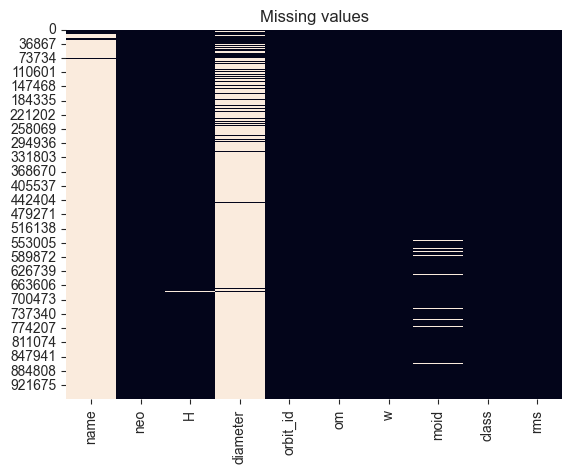

In [25]:
# 5.1. Визуальный анализ отсутствующих значений
sns.heatmap(df_5.isnull(), cbar = False).set_title("Missing values")
df_5.isnull().sum() / df_5.shape[0]

C:\Users\Andrew\AppData\Local\Temp\ipykernel_14964\1528226850.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  sns.barplot(df_5.groupby(['class'], as_index=False)['H'].mean(),


<Axes: xlabel='class', ylabel='H'>

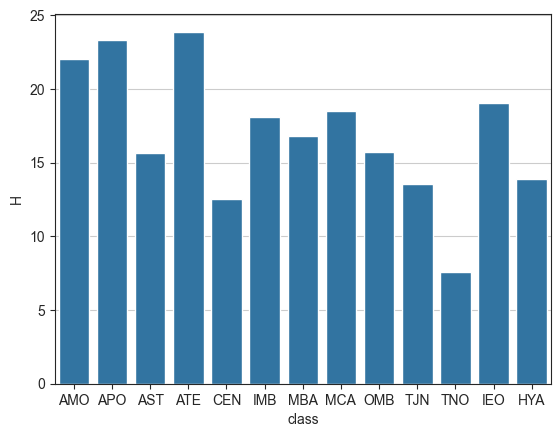

In [26]:
# 5.2 Средняя H в зависимости от class
sns.barplot(df_5.groupby(['class'], as_index=False)['H'].mean(), 
            x='class', 
            y='H')

In [27]:
df_5[df_5['rms'] == 2686.600098]

,name,neo,H,diameter,orbit_id,om,w,moid,class,rms
957691,NaN,Y,27.846001,NaN,JPL 3,158.901993,284.987,0.008841,APO,2686.600098


<Axes: xlabel='rms', ylabel='om'>

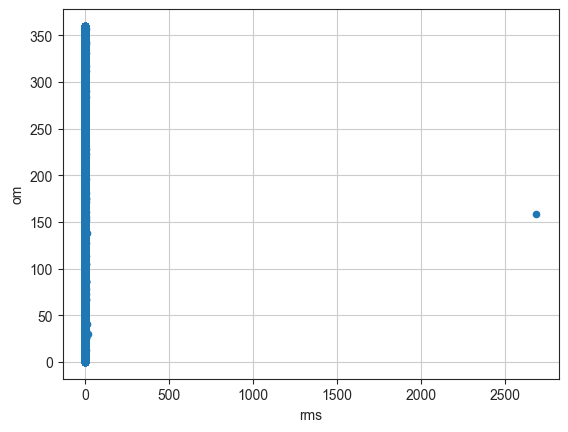

In [28]:
# 5.3. Замечен всплеск
df_5.plot.scatter(x='rms', y='om')

<Axes: xlabel='rms', ylabel='om'>

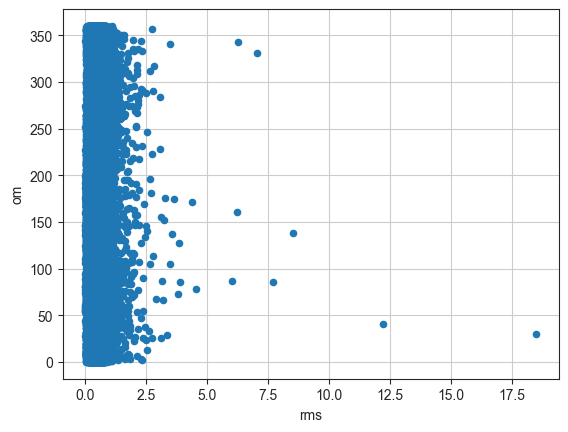

In [29]:
# 5.4. Всплеска нет
df_5.drop(957691).plot.scatter(x='rms', y='om')

<Axes: >

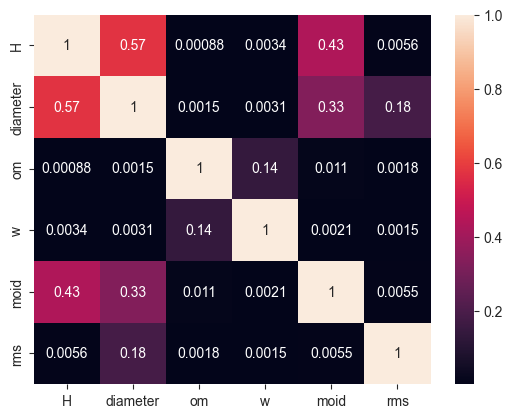

In [30]:
# 5.5. Корреляция числовых значений таблицы
corr = df_5.select_dtypes(['int', 'float',]).corr().abs()
sns.heatmap(corr, annot=True)

## Датасет 6

In [2]:
with open('./result/data6/open_opt_params.json', 'r') as f:
    dtype_6 = json.load(f)
df_6 = pd.read_csv('./data/data_6.csv', dtype=dtype_6, index_col=0)
df_6['Date'] = [elem[0] for elem in df_6['Date'].astype(str).str.split(' ')]
df_6['Date'] = pd.to_datetime(df_6['Date'])
df_6.sample(3)

,Case Number,Date,Block,Primary Type,Arrest,Domestic,Beat,District,Ward,FBI Code
3669572,HK135817,2004-01-20,018XX W 36TH ST,NARCOTICS,True,False,922,9,11,26
5071482,HN272862,2007-04-08,038XX W BELLE PLAINE AVE,THEFT,False,False,1723,17,39,06
4986248,HN144422,2007-01-26,001XX N LARAMIE AVE,NARCOTICS,True,False,1532,15,28,18


<Axes: xlabel='Date'>

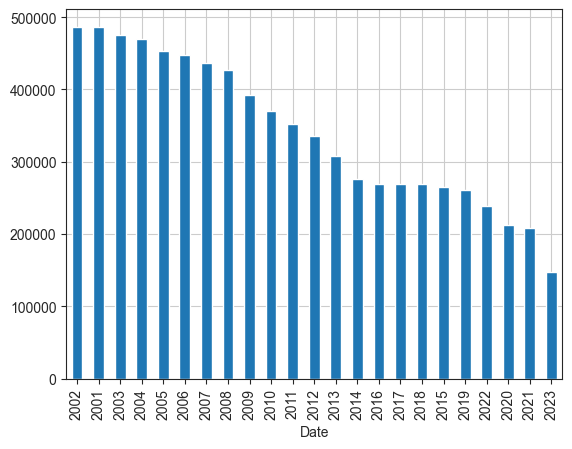

In [3]:
# 6.1. Количество преступлений в год
# Видно, что количество преступлений сокращается со временем
df_6['Date'].dt.year.value_counts().plot(kind='bar')

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22],
 [Text(0, 0, '2001'),
  Text(1, 0, '2002'),
  Text(2, 0, '2003'),
  Text(3, 0, '2004'),
  Text(4, 0, '2005'),
  Text(5, 0, '2006'),
  Text(6, 0, '2007'),
  Text(7, 0, '2008'),
  Text(8, 0, '2009'),
  Text(9, 0, '2010'),
  Text(10, 0, '2011'),
  Text(11, 0, '2012'),
  Text(12, 0, '2013'),
  Text(13, 0, '2014'),
  Text(14, 0, '2015'),
  Text(15, 0, '2016'),
  Text(16, 0, '2017'),
  Text(17, 0, '2018'),
  Text(18, 0, '2019'),
  Text(19, 0, '2020'),
  Text(20, 0, '2021'),
  Text(21, 0, '2022'),
  Text(22, 0, '2023')])

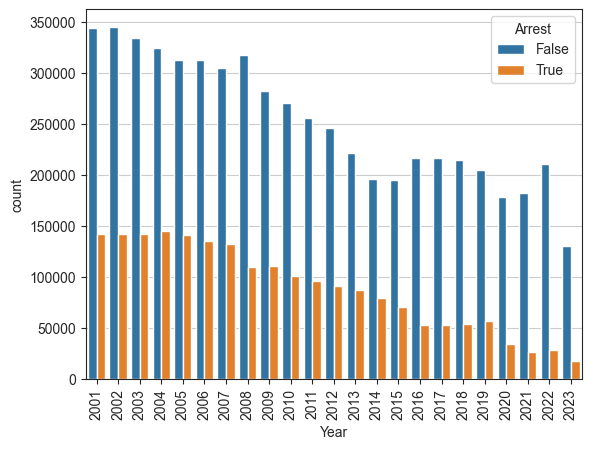

In [4]:
# 6.2. Корреляция числовых значений таблицы
df_6['Year'] = df_6['Date'].dt.year
sns.countplot(x='Year', hue='Arrest', data=df_6)
plt.xticks(rotation=90)

<Axes: xlabel='District', ylabel='Ward'>

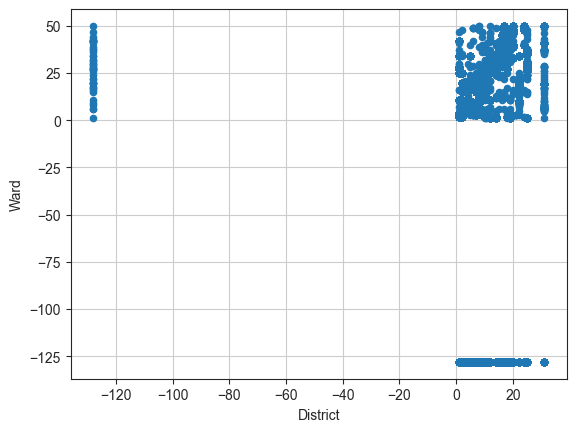

In [9]:
# 6.3. Совместное слияние признаков
df_6.plot.scatter(x='District', y='Ward')

<Axes: >

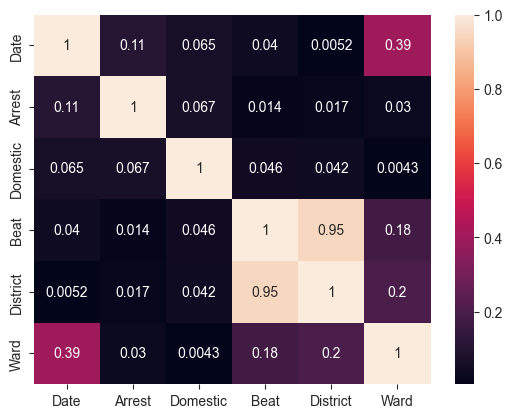

In [14]:
# 6.4. Корреляция числовых данных
corr = df_6[['Date', 'Arrest', 'Domestic', 'Beat', 'District', 'Ward']].corr().abs()
sns.heatmap(corr, annot=True)

<Axes: title={'center': 'Count of arrested'}, ylabel='count'>

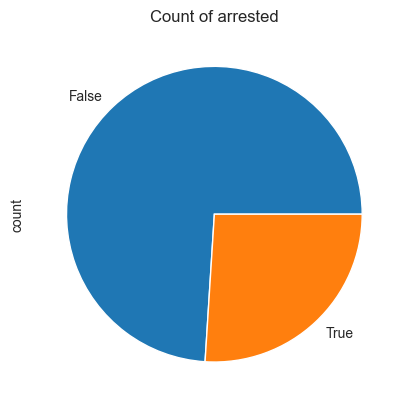

In [19]:
df_6['Arrest'].value_counts().plot(kind='pie', title='Count of arrested')